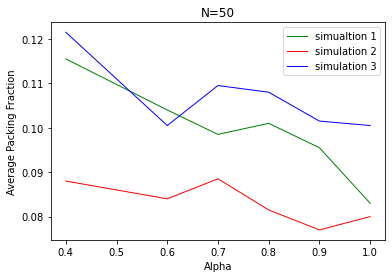

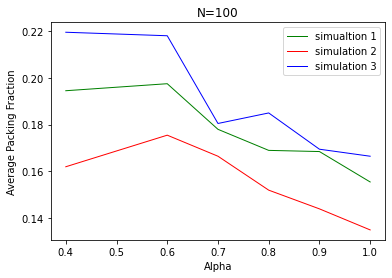

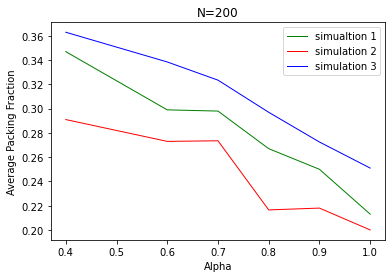

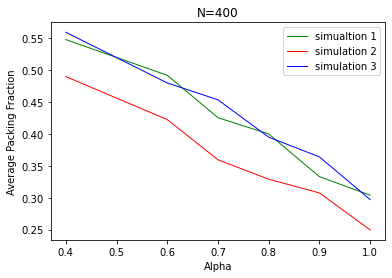

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

Narray = [50, 100, 200, 400]


alist=[]
def packingfraction(alpha, choice, N, N_rep, N_sample, file):    
    pflist= []
    if file == True:
        with open("{0} - {1}".format(alpha, N), "a") as file1:
            file1.truncate(0)
            file1.write('Radius                     x-coordinate         y-coordinate \n')
            file1.close
    while len(pflist) < N_rep:
        # define the function to check if a point is valid
        def checkvalid(positions, alphapos):
            # initialize a flag to indicate if the point is valid
            valid = True
            # loop through the existing positions
            for pos in positions:
                # calculate the distance between the point and the existing position using the Pythagorean theorem
                pythagoras = math.sqrt(abs(pos[0] - alphapos[0])**2 + abs(pos[1] - alphapos[1])**2)
                # calculate the maximum distance between the point and the existing position based on the value of alpha
                alphad = alpha * (pos[2] + alphapos[2])
                # if the distance between the point and the existing position is less than or equal to the maximum distance, the point is not valid
                if (pythagoras) <= (alphad):
                    valid = False
            # return the validity of the point
            return valid


            # loop until the user enters a valid choice
        while True:
            # if the user selects the first option
            if choice == 1:
                # calculate the radius of the particles in the mixture
                R1 = (1/math.sqrt(math.pi))
                R2 = 0
                u = 4
                f = 6
                b = 3
                break
            elif choice == 2:
                R1 = math.sqrt(3/(2*(math.pi)))
                R2 = math.sqrt(1/(2*(math.pi)))
                u = 0
                f = 2
                b = 2
                break
            elif choice == 3:
                R1 = math.sqrt(15/(16*(math.pi)))
                R2 = math.sqrt(5/(4*(math.pi)))
                u = 0
                f = 5
                b = 5
                break
            else:
                print("Solution corresponding to the number you have inputted doesn't exist please try again")

        positions = [] # inside is [x,y,radii]

        fig = plt.gcf() #Defines a figure object
        ax = fig.gca() #Defines an axis object
        plt.xlim(0,20)
        plt.ylim(0,20)
        trials = 0

        while trials != N: # N here was passed through the function
            trials = trials + 1
            add = True
            p = random.randint(u,f)
            position = [(random.randint(0,200) / 10),(random.randint(0,200) / 10)]

            if p < b:
                x = position[0]
                y = position[1]
                position.append(R2)
                if x + R2 > 20 or x - R2 < 0 or y - R2 < 0 or y + R2 > 20:
                    add = False
                valid = checkvalid(positions, [x, y, R2])
                if add == True and valid == True :
                    ax.add_patch( plt.Circle(( x, y ), R2, color='b'))
                    positions.append([x,y,R2])
                    
                    if file == True:
                        file1 = open("{0} - {1}".format(alpha, N), "a")
                        file1.write("{0}           {1}                 {2}\n".format(position[2], position[0], position[1])) # creates the configuration file

            else:
                x = position[0]
                y = position[1]
                position.append(R1)
                if x + R1 > 20 or x - R1 < 0 or y - R1 < 0 or y + R1 > 20:
                    add = False
                valid = checkvalid(positions, [x, y, R1])
                if add == True and valid == True:
                    ax.add_patch( plt.Circle(( x, y ), R1, color='r'))
                    positions.append([x,y,R1])
                    if file == True:
                        file1 = open("{0} - {1}".format(alpha, N), "a")
                        file1.write("{0}          {1}                 {2}\n".format(position[2], position[0], position[1]))

    #show the plot with patches
        plt.show()
        plt.close()

        # initialize counters for valid and invalid points
        num_valid = 0

        # loop through the specified number of random points
        for i in range(N_sample):
            # generate a random point within the defined space
            x = random.uniform(0, 20)
            y = random.uniform(0, 20)

            # initialize a flag to check if the point is inside any of the circles
            inside = False

            # loop through the circles in the mixture
            for circle in positions:
                # calculate the distance between the point and the center of the circle
                pythagoras = math.sqrt((x - circle[0]) ** 2 + (y - circle[1]) ** 2)
                # if the distance is less than the radius of the circle, the point is inside the circle
                if pythagoras <= circle[2]:
                    inside = True
                    break

            # update the counters based on whether the point was inside a circle or not
            if inside:
                num_valid += 1
        packfrac= num_valid/N_sample # this packing fraction here is estimated against the original number that is valid instead of the invalid ones or entire sample
    
    

        pflist.append(packfrac)
    
    return  pflist

def plotfunction(N):
    alpha = [0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
    choice = [1,2,3]
    k=0
    pavsim1 = [] # array holding mean packing fractions for monodisperse simulation
    pavsim2 = []  # array holding mean packing fractions for monodisperse simulation
    pavsim3 = [] # array holding mean packing fractions for monodisperse simulation
    meanpackingfrac = []
    
    
    for x in choice:
            for i in alpha:
                mean = np.mean(packingfraction(i,x,N,10,200,False))
                meanpackingfrac.append(mean)
            if len(meanpackingfrac)==6 and k==2:
                pavsim3 = meanpackingfrac
                k=0
                meanpackingfrac = []

            elif len(meanpackingfrac)==6 and k==1:
                pavsim2 = meanpackingfrac
                k=2
                meanpackingfrac=[]

            elif len(meanpackingfrac)==6:
                pavsim1 = meanpackingfrac  
                k=1
                meanpackingfrac=[]



    x = alpha
    y1= pavsim1
    y2= pavsim2
    y3= pavsim3
    plt.plot( x, y1, 'g-',label='simualtion 1', linewidth = 1.0 )
    plt.plot( x, y2, 'r-',label='simulation 2', linewidth = 1.0)
    plt.plot( x, y3, 'b-',label='simulation 3', linewidth = 1.0 )
    plt.xlabel('Alpha')
    plt.ylabel('Average Packing Fraction')
    plt.title('N={0}'.format(N))
    plt.legend()
    plt.show()
    plt.savefig('myplot.png')
    plt.close()
    


def check_accuracy():
    Nrep = [10, 20, 40, 80]
    Nsample = [100, 200, 400]
    choice = [1,2,3]
        #listname    Nsample   Nrep10  nrep20     nrep40     nrep80 say you want to access the pfrlist of nsample 100 with nrep10 in a monodisperse situation its going to be pfr[[0[0[0]]]]
    rmse_list = [[[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]],[[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]],[[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]]
    for x in Nrep:
        for u in Nsample:
            for v in choice:
                rmse_list[Nsample.index(u)][Nrep.index(x)][choice.index(v)] = np.sqrt((np.std(packingfraction(0.8,v,400,x,u,False)))**2)
    return rmse_list


def print_table(data):
    # Get the length of the innermost list
    n = len(data[0][0])
    
    # Print the top border
    print("*READ ME*", "\n")
    print("This table is formatted with each column representing: monodisperse, bidisperse and additional bidisperse systems",)
    print("Each group of four represents the variation in N_sample: 100, 200 and 400")
    print("Finally, each individual row represents a variation in N_rep as follows: 10, 20, 40, 80", "\n")

    print("     " + "Mono" + "     " +"bid" + "        "+ "ad_bi")
    for i in range(len(data)):
        for j in range(len(data[i])):
            
            # Print the left border
            print("|", end="")
            for k in range(len(data[i][j])):
                # Print the cell with left and right padding
                print(f" {data[i][j][k]:>6.6f} ", end="")
            # Print the right border and go to the next line
            print("|")
        # Print the bottom border
        print("+" + "-"*(n*12+1) + "+")




    
# makes it plot 4 graphs varying N and alpha
for j in Narray:
    plot1 = plotfunction(j) 

print_table(check_accuracy()) # prints the table with the relative mean square deviation error

# creates three configuration files
myconfigfile1 = packingfraction(0.7, 2, 200, 40, 100, True) 
myconfigfile2 = packingfraction(0.4, 3, 400, 80, 200, True)
myconfigfile3 = packingfraction(0.9, 1, 100, 20, 400, True)
